In [357]:
import pickle5 as pickle
import pandas as pd
from lime import lime_text
import sklearn.metrics as metrics
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
n_classes=13

# NB on TFIDF

In [358]:
# Load NB model
loaded_MNB = pickle.load(open("/Users/kaoutar/Desktop/MetagenomicToolsClassifier/Abstracts/ML/BagOfWords/Pickles/Models/06-02-21/best_mnbc.pickle", 'rb'))
classifier= loaded_MNB

# Test Data
X_test = pickle.load(open("/Users/kaoutar/Desktop/MetagenomicToolsClassifier/Abstracts/ML/BagOfWords/Pickles/Models/06-02-21/NB-X_test.pkl", 'rb'))
y_test = pickle.load(open("/Users/kaoutar/Desktop/MetagenomicToolsClassifier/Abstracts/ML/BagOfWords/Pickles/Models/06-02-21/NB-y_test.pkl", 'rb'))

X_train = pickle.load(open("/Users/kaoutar/Desktop/MetagenomicToolsClassifier/Abstracts/ML/BagOfWords/Pickles/Models/06-02-21/NB-X_train.pkl", 'rb'))
y_train = pickle.load(open("/Users/kaoutar/Desktop/MetagenomicToolsClassifier/Abstracts/ML/BagOfWords/Pickles/Models/06-02-21/NB-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

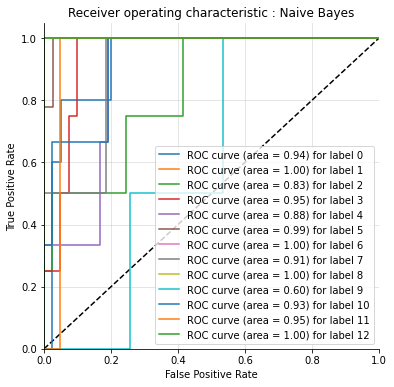

In [359]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(6, 6)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic : Naive Bayes')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(loaded_MNB, X_test, y_test, n_classes=13, figsize=(6, 6))

from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(8, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc="best", prop=dict(size=14))


plt.show()


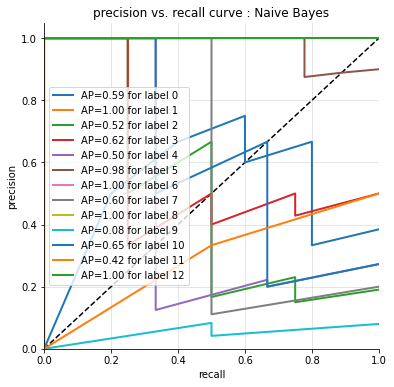

In [360]:
figsize = (6, 6)
n_classes=13
# precision recall curve
precision = dict()
recall = dict()
y_score = loaded_MNB.predict_proba(X_test)

# calculate dummies once
y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
for i in range(n_classes):
    precision[i], recall[i], _ = metrics.precision_recall_curve(y_test_dummies[:, i], y_score[:, i])
    average_precision = metrics.average_precision_score(y_test_dummies[:, i], y_score[:, i])
    #prc_auc[i] = metrics.auc(precision[i], recall[i])
    #plt.plot(recall[i], precision[i], lw=2, label='AP=%0.2f for label %i'%(average_precision,i))

fig, ax = plt.subplots(figsize=figsize)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])

ax.set_xlabel('recall')
ax.set_ylabel('precision')
ax.set_title('precision vs. recall curve : Naive Bayes')
for i in range(n_classes):
    precision[i], recall[i], _ = metrics.precision_recall_curve(y_test_dummies[:, i], y_score[:, i])
    average_precision = metrics.average_precision_score(y_test_dummies[:, i], y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='AP=%0.2f for label %i'%(average_precision,i))
ax.legend(loc="best")
ax.grid(alpha=.4)
sns.despine()
plt.show()


Average precision score, micro-averaged over all classes: 0.61


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.61')

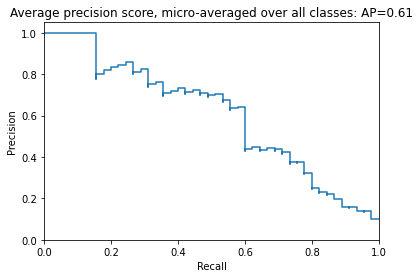

In [361]:
# For each class
precision_NBTFIDF = dict()
recall_NBTFIDF = dict()
average_precision_NBTFIDF = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_NBTFIDF[i], recall_NBTFIDF[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_NBTFIDF[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_NBTFIDF["micro"], recall_NBTFIDF["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_NBTFIDF["micro"] = average_precision_score(y_test_dummies, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_NBTFIDF["micro"]))


plt.figure()
plt.step(recall_NBTFIDF['micro'], precision_NBTFIDF['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision_NBTFIDF["micro"]))

# RF on TFIDF

In [362]:

# Load RF model
loaded_RF = pickle.load(open("/Users/kaoutar/Desktop/MetagenomicToolsClassifier/Abstracts/ML/BagOfWords/Pickles/Models/06-02-21/best_rfc.pickle", 'rb'))
classifier =loaded_RF
# Test Data
X_test = pickle.load(open("/Users/kaoutar/Desktop/MetagenomicToolsClassifier/Abstracts/ML/BagOfWords/Pickles/Models/06-02-21/RF-X_test.pkl", 'rb'))
y_test = pickle.load(open("/Users/kaoutar/Desktop/MetagenomicToolsClassifier/Abstracts/ML/BagOfWords/Pickles/Models/06-02-21/RF-y_test.pkl", 'rb'))

X_train = pickle.load(open("/Users/kaoutar/Desktop/MetagenomicToolsClassifier/Abstracts/ML/BagOfWords/Pickles/Models/06-02-21/RF-X_train.pkl", 'rb'))
y_train = pickle.load(open("/Users/kaoutar/Desktop/MetagenomicToolsClassifier/Abstracts/ML/BagOfWords/Pickles/Models/06-02-21/RF-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

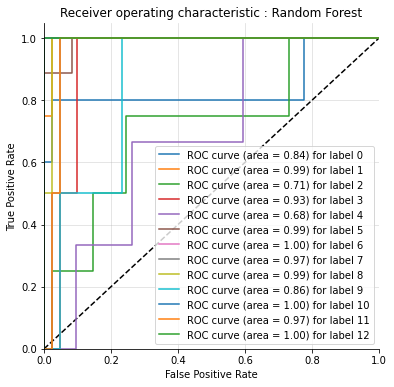

In [363]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(8, 8)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic : Random Forest')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(loaded_RF, X_test, y_test, n_classes=13, figsize=(6, 6))

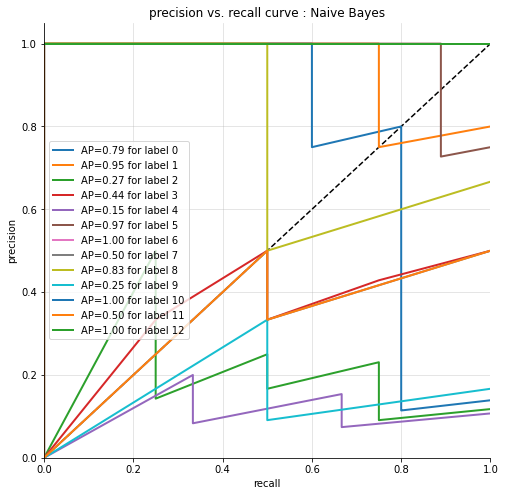

In [364]:
figsize = (8, 8)
# precision recall curve
precision = dict()
recall = dict()
y_score = loaded_RF.predict_proba(X_test)

# calculate dummies once
y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
for i in range(n_classes):
    precision[i], recall[i], _ = metrics.precision_recall_curve(y_test_dummies[:, i], y_score[:, i])
    average_precision = metrics.average_precision_score(y_test_dummies[:, i], y_score[:, i])
    #prc_auc[i] = metrics.auc(precision[i], recall[i])
    #plt.plot(recall[i], precision[i], lw=2, label='AP=%0.2f for label %i'%(average_precision,i))

fig, ax = plt.subplots(figsize=figsize)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])

ax.set_xlabel('recall')
ax.set_ylabel('precision')
ax.set_title('precision vs. recall curve : Naive Bayes')
for i in range(n_classes):
    precision[i], recall[i], _ = metrics.precision_recall_curve(y_test_dummies[:, i], y_score[:, i])
    average_precision = metrics.average_precision_score(y_test_dummies[:, i], y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='AP=%0.2f for label %i'%(average_precision,i))
ax.legend(loc="best")
ax.grid(alpha=.4)
sns.despine()
plt.show()


Average precision score, micro-averaged over all classes: 0.66


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.66')

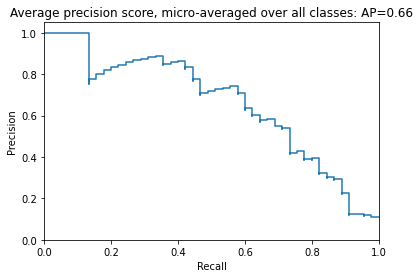

In [365]:

# For each class
precision_RFTFIDF = dict()
recall_RFTFIDF = dict()
average_precision_RFTFIDF = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_RFTFIDF[i], recall_RFTFIDF[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_RFTFIDF[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_RFTFIDF["micro"], recall_RFTFIDF["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_RFTFIDF["micro"] = average_precision_score(y_test_dummies, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_RFTFIDF["micro"]))


plt.figure()
plt.step(recall_RFTFIDF['micro'], precision_RFTFIDF['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_RFTFIDF["micro"]))

# LR on TFIDF

In [366]:
# Load LR model
loaded_LR = pickle.load(open("/Users/kaoutar/Desktop/MetagenomicToolsClassifier/Abstracts/ML/BagOfWords/Pickles/Models/06-02-21/best_lrc.pickle", 'rb'))
classifier = loaded_LR
# Test Data
X_test = pickle.load(open("/Users/kaoutar/Desktop/MetagenomicToolsClassifier/Abstracts/ML/BagOfWords/Pickles/Models/06-02-21/LR-X_test.pkl", 'rb'))
y_test = pickle.load(open("/Users/kaoutar/Desktop/MetagenomicToolsClassifier/Abstracts/ML/BagOfWords/Pickles/Models/06-02-21/LR-y_test.pkl", 'rb'))

X_train = pickle.load(open("/Users/kaoutar/Desktop/MetagenomicToolsClassifier/Abstracts/ML/BagOfWords/Pickles/Models/06-02-21/LR-X_train.pkl", 'rb'))
y_train = pickle.load(open("/Users/kaoutar/Desktop/MetagenomicToolsClassifier/Abstracts/ML/BagOfWords/Pickles/Models/06-02-21/LR-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

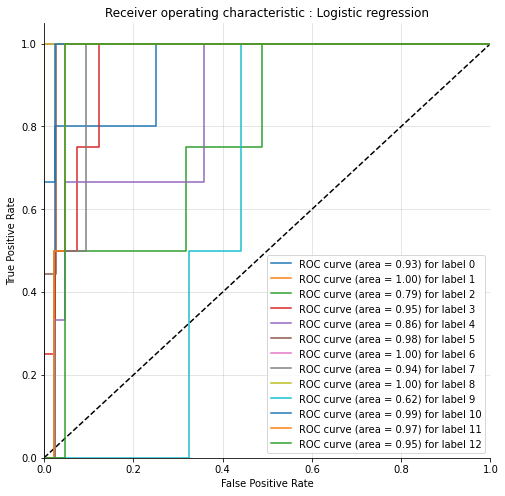

In [367]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic : Logistic regression')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(loaded_LR, X_test, y_test, n_classes=13, figsize=(8, 8))

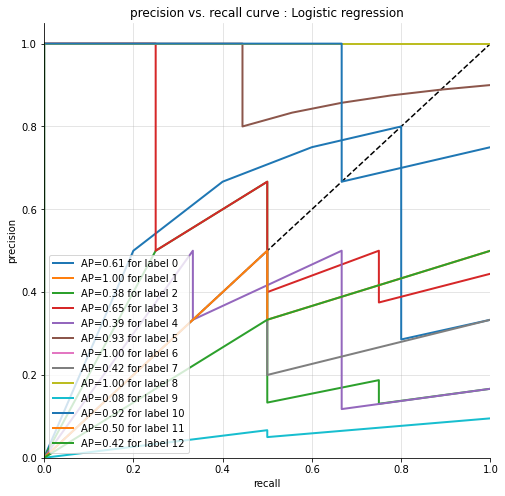

In [368]:
figsize = (8, 8)
# precision recall curve
precision = dict()
recall = dict()
y_score = loaded_LR.predict_proba(X_test)

# calculate dummies once
y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
for i in range(n_classes):
    precision[i], recall[i], _ = metrics.precision_recall_curve(y_test_dummies[:, i], y_score[:, i])
    average_precision = metrics.average_precision_score(y_test_dummies[:, i], y_score[:, i])
    #prc_auc[i] = metrics.auc(precision[i], recall[i])
    #plt.plot(recall[i], precision[i], lw=2, label='AP=%0.2f for label %i'%(average_precision,i))

fig, ax = plt.subplots(figsize=figsize)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])

ax.set_xlabel('recall')
ax.set_ylabel('precision')
ax.set_title('precision vs. recall curve : Logistic regression')
for i in range(n_classes):
    precision[i], recall[i], _ = metrics.precision_recall_curve(y_test_dummies[:, i], y_score[:, i])
    average_precision = metrics.average_precision_score(y_test_dummies[:, i], y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='AP=%0.2f for label %i'%(average_precision,i))
ax.legend(loc="best")
ax.grid(alpha=.4)
sns.despine()
plt.show()



Average precision score, micro-averaged over all classes: 0.62


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.62')

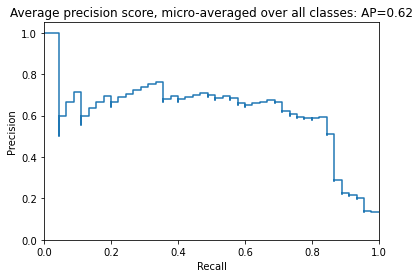

In [369]:

# For each class
precision_LRTFIDF = dict()
recall_LRTFIDF = dict()
average_precision_LRTFIDF = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_LRTFIDF[i], recall_LRTFIDF[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_LRTFIDF[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_LRTFIDF["micro"], recall_LRTFIDF["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_LRTFIDF["micro"] = average_precision_score(y_test_dummies, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_LRTFIDF["micro"]))


plt.figure()
plt.step(recall_LRTFIDF['micro'], precision_LRTFIDF['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_LRTFIDF["micro"]))

# NB on BERS2L

In [370]:
# Load NB model
loaded_MNB = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTS2Lmeth/best_BERTS2L_mnbc.pickle", 'rb'))
classifier = loaded_MNB
# Test Data
X_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTS2Lmeth/BERTS2L-NB-X_test.pkl", 'rb'))
y_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTS2Lmeth/BERTS2L-NB-y_test.pkl", 'rb'))

X_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTS2Lmeth/BERTS2L-NB-X_train.pkl", 'rb'))
y_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTS2Lmeth/BERTS2L-NB-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = loaded_MNB.predict(X_test)


Average precision score, micro-averaged over all classes: 0.27


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.27')

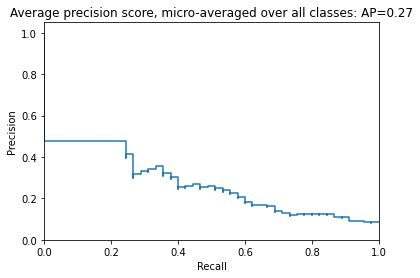

In [371]:

# For each class
precision_NBBERTS2L = dict()
recall_NBBERTS2L = dict()
average_precision_NBBERTS2L = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_NBBERTS2L[i], recall_NBBERTS2L[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_NBBERTS2L[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_NBBERTS2L["micro"], recall_NBBERTS2L["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_NBBERTS2L["micro"] = average_precision_score(y_test_dummies, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_NBBERTS2L["micro"]))


plt.figure()
plt.step(recall_NBBERTS2L['micro'], precision_NBBERTS2L['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_NBBERTS2L["micro"]))

# RF on BERTS2L

In [372]:

# Load RF model
loaded_RF = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTS2Lmeth/best_BERTS2L_rfc.pickle", 'rb'))
classifier = loaded_RF
# Test Data
X_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTS2Lmeth/BERTS2L-RF-X_test.pkl", 'rb'))
y_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTS2Lmeth/BERTS2L-RF-y_test.pkl", 'rb'))

X_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTS2Lmeth/BERTS2L-RF-X_train.pkl", 'rb'))
y_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTS2Lmeth/BERTS2L-RF-y_train.pkl", 'rb'))


# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = loaded_RF.predict(X_test)

Average precision score, micro-averaged over all classes: 0.31


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.31')

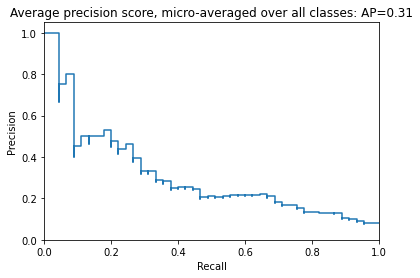

In [373]:

# For each class
precision_RFBERTS2L = dict()
recall_RFBERTS2L = dict()
average_precision_RFBERTS2L = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_RFBERTS2L[i], recall_RFBERTS2L[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_RFBERTS2L[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_RFBERTS2L["micro"], recall_RFBERTS2L["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_RFBERTS2L["micro"] = average_precision_score(y_test_dummies, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_RFBERTS2L["micro"]))


plt.figure()
plt.step(recall_RFBERTS2L['micro'], precision_RFBERTS2L['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_RFBERTS2L["micro"]))

# LR on BERTS2L

In [374]:
# Load LR model
loaded_LR = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTS2Lmeth/best_BERTS2L_lrc.pickle", 'rb'))
classifier = loaded_LR
# Test Data
X_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTS2Lmeth/BERTS2L-LR-X_test.pkl", 'rb'))
y_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTS2Lmeth/BERTS2L-LR-y_test.pkl", 'rb'))

X_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTS2Lmeth/BERTS2L-LR-X_train.pkl", 'rb'))
y_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTS2Lmeth/BERTS2L-LR-y_train.pkl", 'rb'))


# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = loaded_LR.predict(X_test)

Average precision score, micro-averaged over all classes: 0.44


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.44')

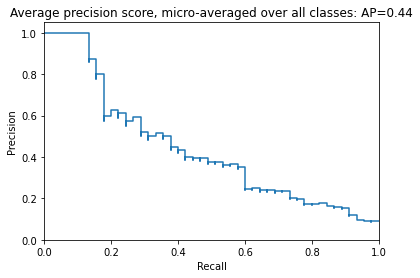

In [375]:

# For each class
precision_LRBERTS2L = dict()
recall_LRBERTS2L = dict()
average_precision_LRBERTS2L = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_LRBERTS2L[i], recall_LRBERTS2L[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_LRBERTS2L[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_LRBERTS2L["micro"], recall_LRBERTS2L["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_LRBERTS2L["micro"] = average_precision_score(y_test_dummies, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_LRBERTS2L["micro"]))


plt.figure()
plt.step(recall_LRBERTS2L['micro'], precision_LRBERTS2L['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_LRBERTS2L["micro"]))

# NB on ELMO

In [376]:
# Load NB model
loaded_MNB = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELMOmeth/best_ELMO_mnbc.pickle", 'rb'))
classifier = loaded_MNB
# Test Data
X_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELMOmeth/ELMO-NB-X_test.pkl", 'rb'))
y_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELMOmeth/ELMO-NB-y_test.pkl", 'rb'))

X_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELMOmeth/ELMO-NB-X_train.pkl", 'rb'))
y_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELMOmeth/ELMO-NB-y_train.pkl", 'rb'))


# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)


Average precision score, micro-averaged over all classes: 0.19


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.19')

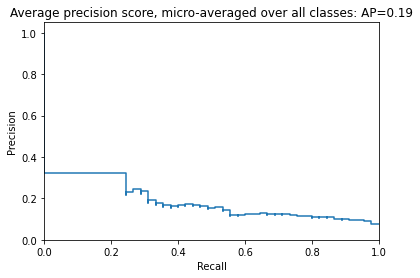

In [377]:

# For each class
precision_NBELMO = dict()
recall_NBELMO = dict()
average_precision_NBELMO = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_NBELMO[i], recall_NBELMO[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_NBELMO[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_NBELMO["micro"], recall_NBELMO["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_NBELMO["micro"] = average_precision_score(y_test_dummies, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_NBELMO["micro"]))


plt.figure()
plt.step(recall_NBELMO['micro'], precision_NBELMO['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_NBELMO["micro"]))

# RF ob ELMO

In [378]:
import pickle5 as pickle

# Load RF model
loaded_RF = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELMOmeth/best_ELMO_rfc.pickle", 'rb'))
classifier = loaded_RF
# Test Data
X_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELMOmeth/ELMO-RF-X_test.pkl", 'rb'))
y_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELMOmeth/ELMO-RF-y_test.pkl", 'rb'))

X_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELMOmeth/ELMO-RF-X_train.pkl", 'rb'))
y_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELMOmeth/ELMO-RF-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)


Average precision score, micro-averaged over all classes: 0.38


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.38')

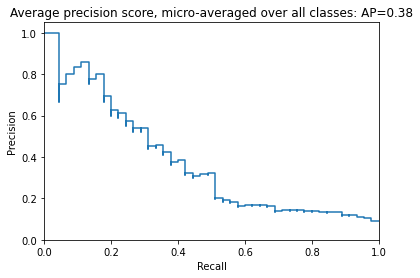

In [379]:

# For each class
precision_RFELMO = dict()
recall_RFELMO = dict()
average_precision_RFELMO = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_RFELMO[i], recall_RFELMO[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_RFELMO[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_RFELMO["micro"], recall_RFELMO["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_RFELMO["micro"] = average_precision_score(y_test_dummies, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_RFELMO["micro"]))


plt.figure()
plt.step(recall_RFELMO['micro'], precision_RFELMO['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_RFELMO["micro"]))

# LR on ELMO

In [380]:
# Load LR model
loaded_LR = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELMOmeth/best_ELMO_lrc.pickle", 'rb'))
classifier = loaded_LR
# Test Data
X_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELMOmeth/ELMO-LR-X_test.pkl", 'rb'))
y_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELMOmeth/ELMO-LR-y_test.pkl", 'rb'))

X_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELMOmeth/ELMO-LR-X_train.pkl", 'rb'))
y_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELMOmeth/ELMO-LR-y_train.pkl", 'rb'))


# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

Average precision score, micro-averaged over all classes: 0.48


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.48')

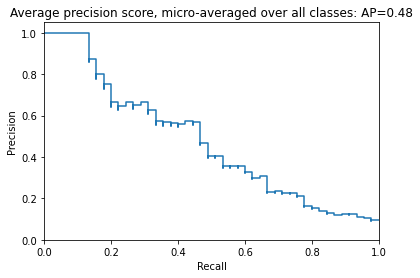

In [381]:

# For each class
precision_LRELMO = dict()
recall_LRELMO = dict()
average_precision_LRELMO = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_LRELMO[i], recall_LRELMO[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_LRELMO[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_LRELMO["micro"], recall_LRELMO["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_LRELMO["micro"] = average_precision_score(y_test_dummies, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_LRELMO["micro"]))


plt.figure()
plt.step(recall_LRELMO['micro'], precision_LRELMO['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_LRELMO["micro"]))

# NB on ELECTRA

In [382]:
# Load NB model
loaded_MNB = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELECTRAmeth/best_ELECTRA_mnbc.pickle", 'rb'))
classifier = loaded_MNB
# Test Data
X_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELECTRAmeth/ELECTRA-NB-X_test.pkl", 'rb'))
y_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELECTRAmeth/ELECTRA-NB-y_test.pkl", 'rb'))

X_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELECTRAmeth/ELECTRA-NB-X_train.pkl", 'rb'))
y_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELECTRAmeth/ELECTRA-NB-y_train.pkl", 'rb'))


# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)


Average precision score, micro-averaged over all classes: 0.14


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.14')

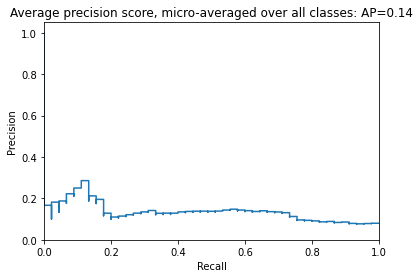

In [383]:

# For each class
precision_NBELECTRA = dict()
recall_NBELECTRA = dict()
average_precision_NBELECTRA = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_NBELECTRA[i], recall_NBELECTRA[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_NBELECTRA[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_NBELECTRA["micro"], recall_NBELECTRA["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_NBELECTRA["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_NBELECTRA["micro"]))


plt.figure()
plt.step(recall_NBELECTRA['micro'], precision_NBELECTRA['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_NBELECTRA["micro"]))

# RF on ELECTRA

In [384]:
import pickle5 as pickle

# Load RF model
loaded_RF = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELECTRAmeth/best_ELECTRA_rfc.pickle", 'rb'))
classifier = loaded_RF
# Test Data
X_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELECTRAmeth/ELECTRA-RF-X_test.pkl", 'rb'))
y_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELECTRAmeth/ELECTRA-RF-y_test.pkl", 'rb'))

X_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELECTRAmeth/ELECTRA-RF-X_train.pkl", 'rb'))
y_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELECTRAmeth/ELECTRA-RF-y_train.pkl", 'rb'))


# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

Average precision score, micro-averaged over all classes: 0.18


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.18')

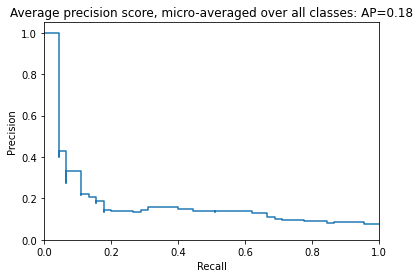

In [385]:

# For each class
precision_RFELECTRA = dict()
recall_RFELECTRA = dict()
average_precision_RFELECTRA = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_RFELECTRA[i], recall_RFELECTRA[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_RFELECTRA[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_RFELECTRA["micro"], recall_RFELECTRA["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_RFELECTRA["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_RFELECTRA["micro"]))


plt.figure()
plt.step(recall_RFELECTRA['micro'], precision_RFELECTRA['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_RFELECTRA["micro"]))

# LR on ELECTRA

In [386]:
# Load LR model
loaded_LR = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELECTRAmeth/best_ELECTRA_lrc.pickle", 'rb'))
classifier = loaded_LR
# Test Data
X_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELECTRAmeth/ELECTRA-LR-X_test.pkl", 'rb'))
y_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELECTRAmeth/ELECTRA-LR-y_test.pkl", 'rb'))

X_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELECTRAmeth/ELECTRA-LR-X_train.pkl", 'rb'))
y_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELECTRAmeth/ELECTRA-LR-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

Average precision score, micro-averaged over all classes: 0.12


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.12')

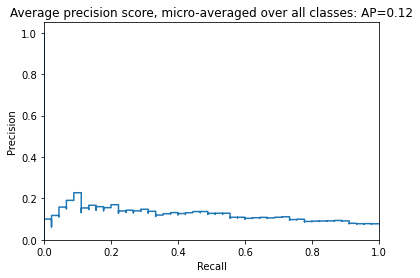

In [387]:

# For each class
precision_LRELECTRA = dict()
recall_LRELECTRA = dict()
average_precision_LRELECTRA = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_LRELECTRA[i], recall_LRELECTRA[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_LRELECTRA[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_LRELECTRA["micro"], recall_LRELECTRA["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_LRELECTRA["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_LRELECTRA["micro"]))


plt.figure()
plt.step(recall_LRELECTRA['micro'], precision_LRELECTRA['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_LRELECTRA["micro"]))

# NB on ELECTRAMED

In [388]:
# Load NB model
loaded_MNB = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELECTRAMEDmeth/best_ELECTRAMED_mnbc.pickle", 'rb'))
classifier = loaded_MNB
# Test Data
X_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELECTRAMEDmeth/ELECTRAMED-NB-X_test.pkl", 'rb'))
y_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELECTRAMEDmeth/ELECTRAMED-NB-y_test.pkl", 'rb'))

X_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELECTRAMEDmeth/ELECTRAMED-NB-X_train.pkl", 'rb'))
y_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELECTRAMEDmeth/ELECTRAMED-NB-y_train.pkl", 'rb'))


# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

Average precision score, micro-averaged over all classes: 0.13


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.13')

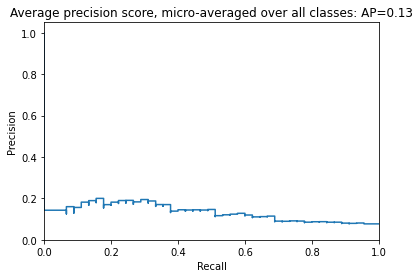

In [389]:

# For each class
precision_NBELECTRAMED = dict()
recall_NBELECTRAMED = dict()
average_precision_NBELECTRAMED = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_NBELECTRAMED[i], recall_NBELECTRAMED[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_NBELECTRAMED[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_NBELECTRAMED["micro"], recall_NBELECTRAMED["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_NBELECTRAMED["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_NBELECTRAMED["micro"]))


plt.figure()
plt.step(recall_NBELECTRAMED['micro'], precision_NBELECTRAMED['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_NBELECTRAMED["micro"]))

# RF on ELECTRAMED

In [390]:
import pickle5 as pickle

# Load RF model
loaded_RF = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELECTRAMEDmeth/best_ELECTRAMED_rfc.pickle", 'rb'))
classifier = loaded_RF
# Test Data
X_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELECTRAMEDmeth/ELECTRAMED-RF-X_test.pkl", 'rb'))
y_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELECTRAMEDmeth/ELECTRAMED-RF-y_test.pkl", 'rb'))

X_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELECTRAMEDmeth/ELECTRAMED-RF-X_train.pkl", 'rb'))
y_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELECTRAMEDmeth/ELECTRAMED-RF-y_train.pkl", 'rb'))


# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

Average precision score, micro-averaged over all classes: 0.20


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.20')

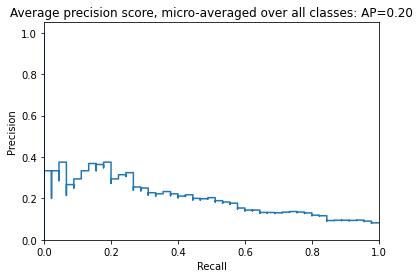

In [391]:

# For each class
precision_RFELECTRAMED = dict()
recall_RFELECTRAMED = dict()
average_precision_RFELECTRAMED = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_RFELECTRAMED[i], recall_RFELECTRAMED[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_RFELECTRAMED[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_RFELECTRAMED["micro"], recall_RFELECTRAMED["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_RFELECTRAMED["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_RFELECTRAMED["micro"]))


plt.figure()
plt.step(recall_RFELECTRAMED['micro'], precision_RFELECTRAMED['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_RFELECTRAMED["micro"]))

# LR on ELECTRAMED

In [392]:
# Load LR model
loaded_LR = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELECTRAMEDmeth/best_ELECTRAMED_lrc.pickle", 'rb'))
classifier = loaded_LR
# Test Data
X_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELECTRAMEDmeth/ELECTRAMED-LR-X_test.pkl", 'rb'))
y_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELECTRAMEDmeth/ELECTRAMED-LR-y_test.pkl", 'rb'))

X_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELECTRAMEDmeth/ELECTRAMED-LR-X_train.pkl", 'rb'))
y_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ELECTRAMEDmeth/ELECTRAMED-LR-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

Average precision score, micro-averaged over all classes: 0.17


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.17')

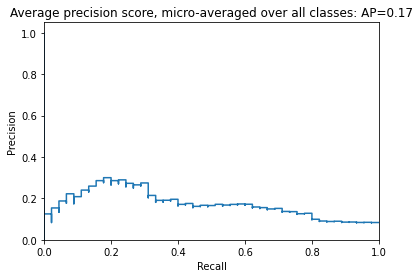

In [393]:

# For each class
precision_LRELECTRAMED = dict()
recall_LRELECTRAMED = dict()
average_precision_LRELECTRAMED = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_LRELECTRAMED[i], recall_LRELECTRAMED[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_LRELECTRAMED[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_LRELECTRAMED["micro"], recall_LRELECTRAMED["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_LRELECTRAMED["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_LRELECTRAMED["micro"]))


plt.figure()
plt.step(recall_LRELECTRAMED['micro'], precision_LRELECTRAMED['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_LRELECTRAMED["micro"]))

# NB on XLNET

In [394]:
# Load NB model
loaded_MNB = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/XLNETmeth/best_XLNET_mnbc.pickle", 'rb'))
classifier= loaded_MNB
# Test Data
X_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/XLNETmeth/XLNET-NB-X_test.pkl", 'rb'))
y_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/XLNETmeth/XLNET-NB-y_test.pkl", 'rb'))

X_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/XLNETmeth/XLNET-NB-X_train.pkl", 'rb'))
y_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/XLNETmeth/XLNET-NB-y_train.pkl", 'rb'))

# make predictions

y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)


Average precision score, micro-averaged over all classes: 0.34


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.34')

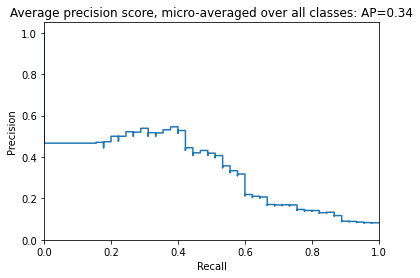

In [395]:

# For each class
precision_NBXLNET = dict()
recall_NBXLNET = dict()
average_precision_NBXLNET = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_NBXLNET[i], recall_NBXLNET[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_NBXLNET[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_NBXLNET["micro"], recall_NBXLNET["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_NBXLNET["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_NBXLNET["micro"]))


plt.figure()
plt.step(recall_NBXLNET['micro'], precision_NBXLNET['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_NBXLNET["micro"]))

# RF on XLNET

In [396]:
import pickle5 as pickle

# Load RF model
loaded_RF = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/XLNETmeth/best_XLNET_rfc.pickle", 'rb'))
classifier = loaded_RF
# Test Data
X_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/XLNETmeth/XLNET-RF-X_test.pkl", 'rb'))
y_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/XLNETmeth/XLNET-RF-y_test.pkl", 'rb'))

X_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/XLNETmeth/XLNET-RF-X_train.pkl", 'rb'))
y_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/XLNETmeth/XLNET-RF-y_train.pkl", 'rb'))


# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

Average precision score, micro-averaged over all classes: 0.32


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.32')

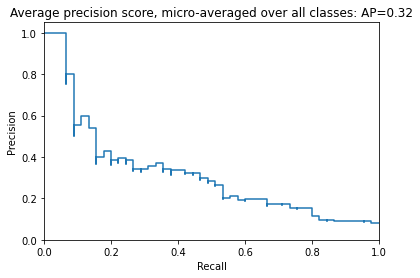

In [397]:

# For each class
precision_RFXLNET = dict()
recall_RFXLNET = dict()
average_precision_RFXLNET = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_RFXLNET[i], recall_RFXLNET[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_RFXLNET[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_RFXLNET["micro"], recall_RFXLNET["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_RFXLNET["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_RFXLNET["micro"]))


plt.figure()
plt.step(recall_RFXLNET['micro'], precision_RFXLNET['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_RFXLNET["micro"]))

# LR on XLNET

In [398]:
# Load LR model
loaded_LR = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/XLNETmeth/best_XLNET_lrc.pickle", 'rb'))
classifier = loaded_LR
# Test Data
X_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/XLNETmeth/XLNET-LR-X_test.pkl", 'rb'))
y_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/XLNETmeth/XLNET-LR-y_test.pkl", 'rb'))

X_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/XLNETmeth/XLNET-LR-X_train.pkl", 'rb'))
y_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/XLNETmeth/XLNET-LR-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

Average precision score, micro-averaged over all classes: 0.40


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.40')

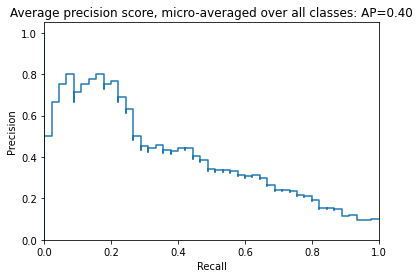

In [399]:

# For each class
precision_LRXLNET = dict()
recall_LRXLNET = dict()
average_precision_LRXLNET = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_LRXLNET[i], recall_LRXLNET[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_LRXLNET[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_LRXLNET["micro"], recall_LRXLNET["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_LRXLNET["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_LRXLNET["micro"]))


plt.figure()
plt.step(recall_LRXLNET['micro'], precision_LRXLNET['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_LRXLNET["micro"]))

# NB on RoBERTa

In [400]:
# Load NB model
loaded_MNB = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ROBERTAmeth/best_ROBERTA_mnbc.pickle", 'rb'))
classifier = loaded_MNB
# Test Data
X_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ROBERTAmeth/ROBERTA-NB-X_test.pkl", 'rb'))
y_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ROBERTAmeth/ROBERTA-NB-y_test.pkl", 'rb'))

X_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ROBERTAmeth/ROBERTA-NB-X_train.pkl", 'rb'))
y_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ROBERTAmeth/ROBERTA-NB-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)



Average precision score, micro-averaged over all classes: 0.31


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.31')

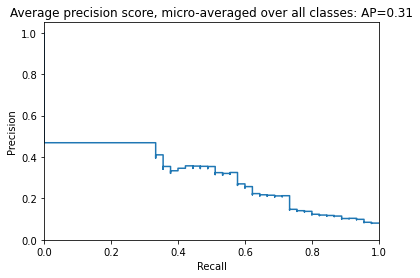

In [401]:

# For each class
precision_NBRoBERTa = dict()
recall_NBRoBERTa = dict()
average_precision_NBRoBERTa = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_NBRoBERTa[i], recall_NBRoBERTa[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_NBRoBERTa[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_NBRoBERTa["micro"], recall_NBRoBERTa["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_NBRoBERTa["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_NBRoBERTa["micro"]))


plt.figure()
plt.step(recall_NBRoBERTa['micro'], precision_NBRoBERTa['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_NBRoBERTa["micro"]))

# RF on RoBERTa

In [402]:

# Load RF model
loaded_RF = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ROBERTAmeth/best_ROBERTA_rfc.pickle", 'rb'))
classifier = loaded_RF
# Test Data
X_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ROBERTAmeth/ROBERTA-RF-X_test.pkl", 'rb'))
y_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ROBERTAmeth/ROBERTA-RF-y_test.pkl", 'rb'))

X_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ROBERTAmeth/ROBERTA-RF-X_train.pkl", 'rb'))
y_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ROBERTAmeth/ROBERTA-RF-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

Average precision score, micro-averaged over all classes: 0.36


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.36')

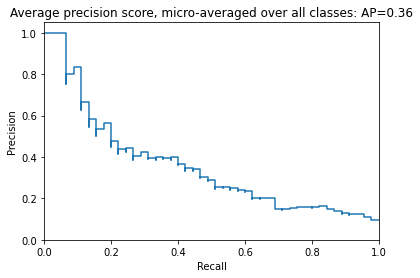

In [403]:

# For each class
precision_RFRoBERTa = dict()
recall_RFRoBERTa = dict()
average_precision_RFRoBERTa = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_RFRoBERTa[i], recall_RFRoBERTa[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_RFRoBERTa[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_RFRoBERTa["micro"], recall_RFRoBERTa["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_RFRoBERTa["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_RFRoBERTa["micro"]))


plt.figure()
plt.step(recall_RFRoBERTa['micro'], precision_RFRoBERTa['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_RFRoBERTa["micro"]))

# LR on RoBERTa

In [404]:
# Load LR model
loaded_LR = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ROBERTAmeth/best_ROBERTA_lrc.pickle", 'rb'))
classifier = loaded_LR

# Test Data
X_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ROBERTAmeth/ROBERTA-LR-X_test.pkl", 'rb'))
y_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ROBERTAmeth/ROBERTA-LR-y_test.pkl", 'rb'))

X_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ROBERTAmeth/ROBERTA-LR-X_train.pkl", 'rb'))
y_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/ROBERTAmeth/ROBERTA-LR-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

Average precision score, micro-averaged over all classes: 0.38


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.38')

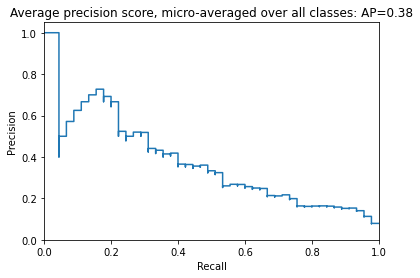

In [405]:

# For each class
precision_LRRoBERTa = dict()
recall_LRRoBERTa = dict()
average_precision_LRRoBERTa = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_LRRoBERTa[i], recall_LRRoBERTa[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_LRRoBERTa[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_LRRoBERTa["micro"], recall_LRRoBERTa["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_LRRoBERTa["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_LRRoBERTa["micro"]))


plt.figure()
plt.step(recall_LRRoBERTa['micro'], precision_LRRoBERTa['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_LRRoBERTa["micro"]))

# NB on BERT

In [406]:
# Load NB model
loaded_MNB = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTstsbmeth/best_BERTstsb_mnbc.pickle", 'rb'))
classifier = loaded_MNB
# Test Data
X_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTstsbmeth/BERTstsb-NB-X_test.pkl", 'rb'))
y_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTstsbmeth/BERTstsb-NB-y_test.pkl", 'rb'))

X_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTstsbmeth/BERTstsb-NB-X_train.pkl", 'rb'))
y_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTstsbmeth/BERTstsb-NB-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)


Average precision score, micro-averaged over all classes: 0.30


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.30')

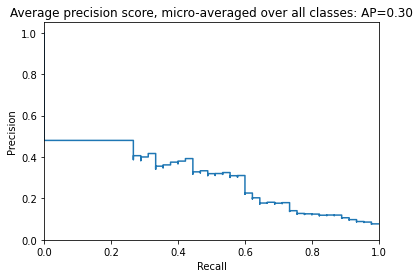

In [407]:

# For each class
precision_NBBERT = dict()
recall_NBBERT = dict()
average_precision_NBBERT = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_NBBERT[i], recall_NBBERT[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_NBBERT[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_NBBERT["micro"], recall_NBBERT["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_NBBERT["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_NBBERT["micro"]))


plt.figure()
plt.step(recall_NBBERT['micro'], precision_NBBERT['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_NBBERT["micro"]))

# RF on BERT

In [408]:

# Load RF model
loaded_RF = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTstsbmeth/best_BERTstsb_rfc.pickle", 'rb'))
classifier = loaded_RF

# Test Data
X_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTstsbmeth/BERTstsb-RF-X_test.pkl", 'rb'))
y_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTstsbmeth/BERTstsb-RF-y_test.pkl", 'rb'))

X_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTstsbmeth/BERTstsb-RF-X_train.pkl", 'rb'))
y_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTstsbmeth/BERTstsb-RF-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

Average precision score, micro-averaged over all classes: 0.35


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.35')

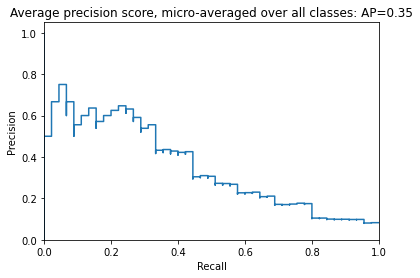

In [409]:

# For each class
precision_RFBERT = dict()
recall_RFBERT = dict()
average_precision_RFBERT = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_RFBERT[i], recall_RFBERT[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_RFBERT[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_RFBERT["micro"], recall_RFBERT["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_RFBERT["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_RFBERT["micro"]))


plt.figure()
plt.step(recall_RFBERT['micro'], precision_RFBERT['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_RFBERT["micro"]))

# LR on BERT

In [410]:
# Load LR model
loaded_LR = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTstsbmeth/best_BERTstsb_lrc.pickle", 'rb'))
classifier = loaded_LR

# Test Data
X_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTstsbmeth/BERTstsb-LR-X_test.pkl", 'rb'))
y_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTstsbmeth/BERTstsb-LR-y_test.pkl", 'rb'))

X_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTstsbmeth/BERTstsb-LR-X_train.pkl", 'rb'))
y_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTstsbmeth/BERTstsb-LR-y_train.pkl", 'rb'))


# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

Average precision score, micro-averaged over all classes: 0.48


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.48')

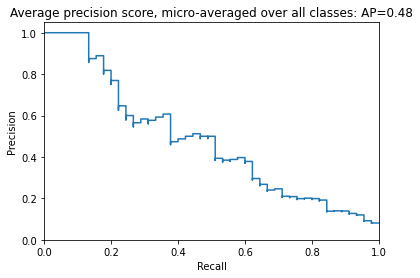

In [411]:

# For each class
precision_LRBERT = dict()
recall_LRBERT = dict()
average_precision_LRBERT = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_LRBERT[i], recall_LRBERT[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_LRBERT[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_LRBERT["micro"], recall_LRBERT["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_LRBERT["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_LRBERT["micro"]))


plt.figure()
plt.step(recall_LRBERT['micro'], precision_LRBERT['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_LRBERT["micro"]))

# NB on BioBERT

In [412]:
# Load NB model
loaded_MNB = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BIOBERTmeth/best_BIOBERT_mnbc.pickle", 'rb'))
classifier = loaded_MNB
# Test Data
X_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BIOBERTmeth/BIOBERT-NB-X_test.pkl", 'rb'))
y_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BIOBERTmeth/BIOBERT-NB-y_test.pkl", 'rb'))

X_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BIOBERTmeth/BIOBERT-NB-X_train.pkl", 'rb'))
y_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BIOBERTmeth/BIOBERT-NB-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)


Average precision score, micro-averaged over all classes: 0.28


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.28')

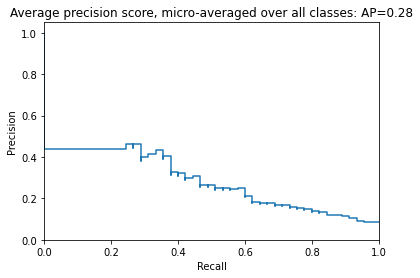

In [413]:

# For each class
precision_NBBioBERT = dict()
recall_NBBioBERT = dict()
average_precision_NBBioBERT = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_NBBioBERT[i], recall_NBBioBERT[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_NBBioBERT[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_NBBioBERT["micro"], recall_NBBioBERT["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_NBBioBERT["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_NBBioBERT["micro"]))


plt.figure()
plt.step(recall_NBBioBERT['micro'], precision_NBBioBERT['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_NBBioBERT["micro"]))

# RF on BioBERT

In [414]:

# Load RF model
loaded_RF = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BIOBERTmeth/best_BIOBERT_rfc.pickle", 'rb'))
classifier = loaded_RF
# Test Data
X_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BIOBERTmeth/BIOBERT-RF-X_test.pkl", 'rb'))
y_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BIOBERTmeth/BIOBERT-RF-y_test.pkl", 'rb'))

X_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BIOBERTmeth/BIOBERT-RF-X_train.pkl", 'rb'))
y_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BIOBERTmeth/BIOBERT-RF-y_train.pkl", 'rb'))


# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

Average precision score, micro-averaged over all classes: 0.33


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.33')

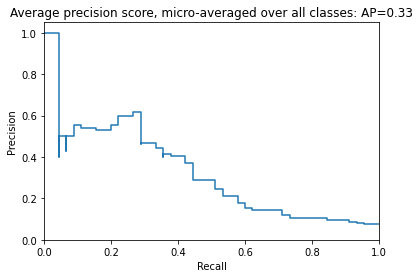

In [415]:

# For each class
precision_RFBioBERT = dict()
recall_RFBioBERT = dict()
average_precision_RFBioBERT = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_RFBioBERT[i], recall_RFBioBERT[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_RFBioBERT[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_RFBioBERT["micro"], recall_RFBioBERT["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_RFBioBERT["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_RFBioBERT["micro"]))


plt.figure()
plt.step(recall_RFBioBERT['micro'], precision_RFBioBERT['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_RFBioBERT["micro"]))

# LR on BioBERT

In [416]:
# Load LR model
loaded_LR = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BIOBERTmeth/best_BIOBERT_lrc.pickle", 'rb'))
classifier = loaded_LR
# Test Data
X_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BIOBERTmeth/BIOBERT-LR-X_test.pkl", 'rb'))
y_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BIOBERTmeth/BIOBERT-LR-y_test.pkl", 'rb'))

X_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BIOBERTmeth/BIOBERT-LR-X_train.pkl", 'rb'))
y_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BIOBERTmeth/BIOBERT-LR-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

Average precision score, micro-averaged over all classes: 0.46


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.46')

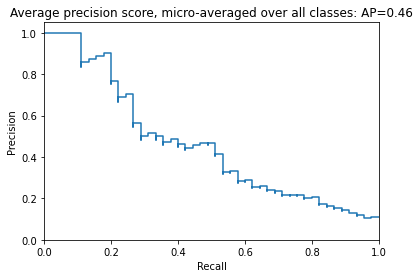

In [417]:

# For each class
precision_LRBioBERT = dict()
recall_LRBioBERT = dict()
average_precision_LRBioBERT = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_LRBioBERT[i], recall_LRBioBERT[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_LRBioBERT[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_LRBioBERT["micro"], recall_LRBioBERT["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_LRBioBERT["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_LRBioBERT["micro"]))


plt.figure()
plt.step(recall_LRBioBERT['micro'], precision_LRBioBERT['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_LRBioBERT["micro"]))

# NB on GLOVE

In [418]:
# Load NB model
loaded_MNB = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/GLOVEmeth/best_GLOVE_mnbc.pickle", 'rb'))
classifier = loaded_MNB
# Test Data
X_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/GLOVEmeth/GLOVE-NB-X_test.pkl", 'rb'))
y_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/GLOVEmeth/GLOVE-NB-y_test.pkl", 'rb'))

X_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/GLOVEmeth/GLOVE-NB-X_train.pkl", 'rb'))
y_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/GLOVEmeth/GLOVE-NB-y_train.pkl", 'rb'))


# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)


Average precision score, micro-averaged over all classes: 0.29


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.29')

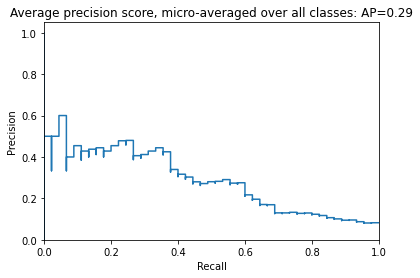

In [419]:

# For each class
precision_NBGLOVE = dict()
recall_NBGLOVE = dict()
average_precision_NBGLOVE = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_NBGLOVE[i], recall_NBGLOVE[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_NBGLOVE[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_NBGLOVE["micro"], recall_NBGLOVE["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_NBGLOVE["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_NBGLOVE["micro"]))


plt.figure()
plt.step(recall_NBGLOVE['micro'], precision_NBGLOVE['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_NBGLOVE["micro"]))

# RF on GLOVE

In [420]:

# Load RF model
loaded_RF = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/GLOVEmeth/best_GLOVE_rfc.pickle", 'rb'))
classifier = loaded_RF
# Test Data
X_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/GLOVEmeth/GLOVE-RF-X_test.pkl", 'rb'))
y_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/GLOVEmeth/GLOVE-RF-y_test.pkl", 'rb'))

X_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/GLOVEmeth/GLOVE-RF-X_train.pkl", 'rb'))
y_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/GLOVEmeth/GLOVE-RF-y_train.pkl", 'rb'))


# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

Average precision score, micro-averaged over all classes: 0.36


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.36')

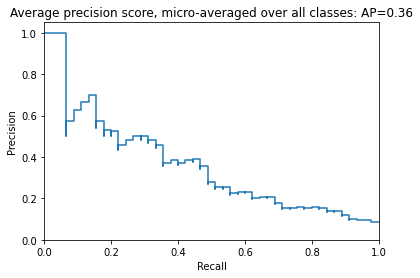

In [421]:

# For each class
precision_RFGLOVE = dict()
recall_RFGLOVE = dict()
average_precision_RFGLOVE = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_RFGLOVE[i], recall_RFGLOVE[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_RFGLOVE[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_RFGLOVE["micro"], recall_RFGLOVE["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_RFGLOVE["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_RFGLOVE["micro"]))


plt.figure()
plt.step(recall_RFGLOVE['micro'], precision_RFGLOVE['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_RFGLOVE["micro"]))

# LR on GLOVE

In [422]:
# Load LR model
loaded_LR = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/GLOVEmeth/best_GLOVE_lrc.pickle", 'rb'))
classifier = loaded_LR
# Test Data
X_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/GLOVEmeth/GLOVE-LR-X_test.pkl", 'rb'))
y_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/GLOVEmeth/GLOVE-LR-y_test.pkl", 'rb'))

X_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/GLOVEmeth/GLOVE-LR-X_train.pkl", 'rb'))
y_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/GLOVEmeth/GLOVE-LR-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

Average precision score, micro-averaged over all classes: 0.20


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.20')

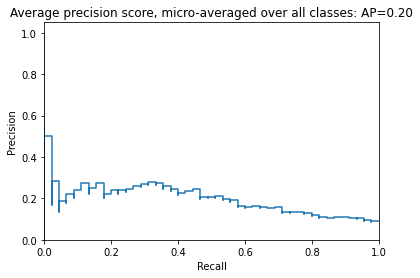

In [423]:

# For each class
precision_LRGLOVE = dict()
recall_LRGLOVE = dict()
average_precision_LRGLOVE = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_LRGLOVE[i], recall_LRGLOVE[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_LRGLOVE[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_LRGLOVE["micro"], recall_LRGLOVE["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_LRGLOVE["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_LRGLOVE["micro"]))


plt.figure()
plt.step(recall_LRGLOVE['micro'], precision_LRGLOVE['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_LRGLOVE["micro"]))

# NB on BERTSL4

In [424]:
# Load NB model
loaded_MNB = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTSL4meth/best_BERTSL4_mnbc.pickle", 'rb'))
classifier = loaded_MNB
# Test Data
X_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTSL4meth/BERTSL4-NB-X_test.pkl", 'rb'))
y_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTSL4meth/BERTSL4-NB-y_test.pkl", 'rb'))

X_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTSL4meth/BERTSL4-NB-X_train.pkl", 'rb'))
y_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTSL4meth/BERTSL4-NB-y_train.pkl", 'rb'))


# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)


Average precision score, micro-averaged over all classes: 0.27


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.27')

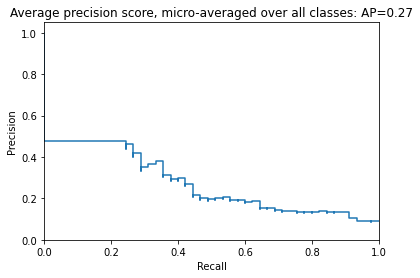

In [425]:

# For each class
precision_NBBERTSL4 = dict()
recall_NBBERTSL4 = dict()
average_precision_NBBERTSL4 = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_NBBERTSL4[i], recall_NBBERTSL4[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_NBBERTSL4[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_NBBERTSL4["micro"], recall_NBBERTSL4["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_NBBERTSL4["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_NBBERTSL4["micro"]))


plt.figure()
plt.step(recall_NBBERTSL4['micro'], precision_NBBERTSL4['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_NBBERTSL4["micro"]))

# RF on BERTSL4

In [426]:

# Load RF model
loaded_RF = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTSL4meth/best_BERTSL4_rfc.pickle", 'rb'))
classifier = loaded_RF
# Test Data
X_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTSL4meth/BERTSL4-RF-X_test.pkl", 'rb'))
y_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTSL4meth/BERTSL4-RF-y_test.pkl", 'rb'))

X_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTSL4meth/BERTSL4-RF-X_train.pkl", 'rb'))
y_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTSL4meth/BERTSL4-RF-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

Average precision score, micro-averaged over all classes: 0.37


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.37')

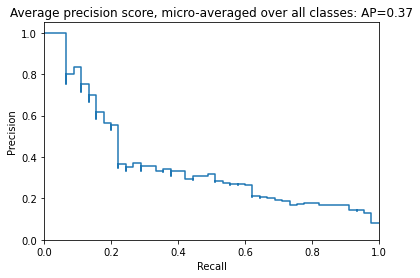

In [427]:

# For each class
precision_RFBERTSL4 = dict()
recall_RFBERTSL4 = dict()
average_precision_RFBERTSL4 = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_RFBERTSL4[i], recall_RFBERTSL4[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_RFBERTSL4[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_RFBERTSL4["micro"], recall_RFBERTSL4["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_RFBERTSL4["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_RFBERTSL4["micro"]))


plt.figure()
plt.step(recall_RFBERTSL4['micro'], precision_RFBERTSL4['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_RFBERTSL4["micro"]))

# LR on BERTSL4

In [428]:
# Load LR model
loaded_LR = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTSL4meth/best_BERTSL4_lrc.pickle", 'rb'))
classifier = loaded_LR
# Test Data
X_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTSL4meth/BERTSL4-LR-X_test.pkl", 'rb'))
y_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTSL4meth/BERTSL4-LR-y_test.pkl", 'rb'))

X_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTSL4meth/BERTSL4-LR-X_train.pkl", 'rb'))
y_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTSL4meth/BERTSL4-LR-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

Average precision score, micro-averaged over all classes: 0.40


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.40')

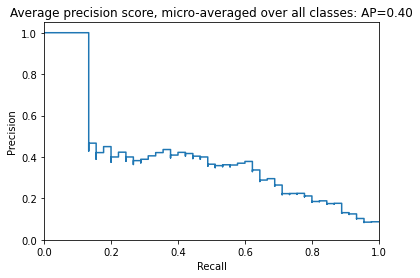

In [429]:

# For each class
precision_LRBERTSL4 = dict()
recall_LRBERTSL4 = dict()
average_precision_LRBERTSL4 = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_LRBERTSL4[i], recall_LRBERTSL4[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_LRBERTSL4[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_LRBERTSL4["micro"], recall_LRBERTSL4["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_LRBERTSL4["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_LRBERTSL4["micro"]))


plt.figure()
plt.step(recall_LRBERTSL4['micro'], precision_LRBERTSL4['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_LRBERTSL4["micro"]))

# NB on BERTCL4

In [430]:
# Load NB model
loaded_MNB = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTCL4meth/best_BERTCL4_mnbc.pickle", 'rb'))
classifier= loaded_MNB
# Test Data
X_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTCL4meth/BERTCL4-NB-X_test.pkl", 'rb'))
y_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTCL4meth/BERTCL4-NB-y_test.pkl", 'rb'))

X_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTCL4meth/BERTCL4-NB-X_train.pkl", 'rb'))
y_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTCL4meth/BERTCL4-NB-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)


Average precision score, micro-averaged over all classes: 0.24


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.24')

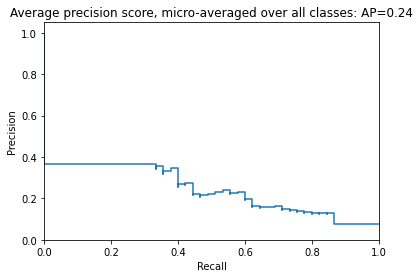

In [431]:

# For each class
precision_NBBERTCL4 = dict()
recall_NBBERTCL4 = dict()
average_precision_NBBERTCL4 = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_NBBERTCL4[i], recall_NBBERTCL4[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_NBBERTCL4[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_NBBERTCL4["micro"], recall_NBBERTCL4["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_NBBERTCL4["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_NBBERTCL4["micro"]))


plt.figure()
plt.step(recall_NBBERTCL4['micro'], precision_NBBERTCL4['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_NBBERTCL4["micro"]))

# RF on BERTCL4

In [432]:

# Load RF model
loaded_RF = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTCL4meth/best_BERTCL4_rfc.pickle", 'rb'))
classifier = loaded_RF
# Test Data
X_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTCL4meth/BERTCL4-RF-X_test.pkl", 'rb'))
y_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTCL4meth/BERTCL4-RF-y_test.pkl", 'rb'))

X_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTCL4meth/BERTCL4-RF-X_train.pkl", 'rb'))
y_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTCL4meth/BERTCL4-RF-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

Average precision score, micro-averaged over all classes: 0.33


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.33')

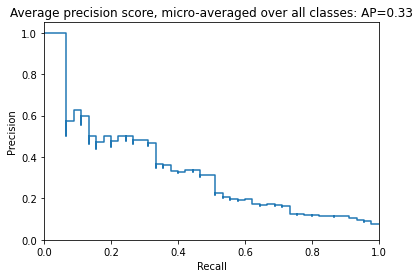

In [433]:

# For each class
precision_RFBERTCL4 = dict()
recall_RFBERTCL4 = dict()
average_precision_RFBERTCL4 = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_RFBERTCL4[i], recall_RFBERTCL4[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_RFBERTCL4[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_RFBERTCL4["micro"], recall_RFBERTCL4["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_RFBERTCL4["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_RFBERTCL4["micro"]))


plt.figure()
plt.step(recall_RFBERTCL4['micro'], precision_RFBERTCL4['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_RFBERTCL4["micro"]))

# LR on BERTCL4

In [434]:
# Load LR model
loaded_LR = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTCL4meth/best_BERTCL4_lrc.pickle", 'rb'))
classifier = loaded_LR
# Test Data
X_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTCL4meth/BERTCL4-LR-X_test.pkl", 'rb'))
y_test = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTCL4meth/BERTCL4-LR-y_test.pkl", 'rb'))

X_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTCL4meth/BERTCL4-LR-X_train.pkl", 'rb'))
y_train = pickle.load(open("/Volumes/TOSHIBAEXT/berts/LMO_Results/nkw/methd/BERTCL4meth/BERTCL4-LR-y_train.pkl", 'rb'))
# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

Average precision score, micro-averaged over all classes: 0.41


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.41')

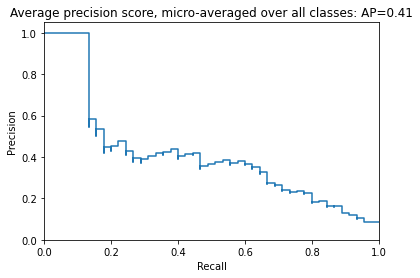

In [435]:

# For each class
precision_LRBERTCL4 = dict()
recall_LRBERTCL4 = dict()
average_precision_LRBERTCL4 = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_LRBERTCL4[i], recall_LRBERTCL4[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_LRBERTCL4[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_LRBERTCL4["micro"], recall_LRBERTCL4["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_LRBERTCL4["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_LRBERTCL4["micro"]))


plt.figure()
plt.step(recall_LRBERTCL4['micro'], precision_LRBERTCL4['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_LRBERTCL4["micro"]))

# all micro average precisions

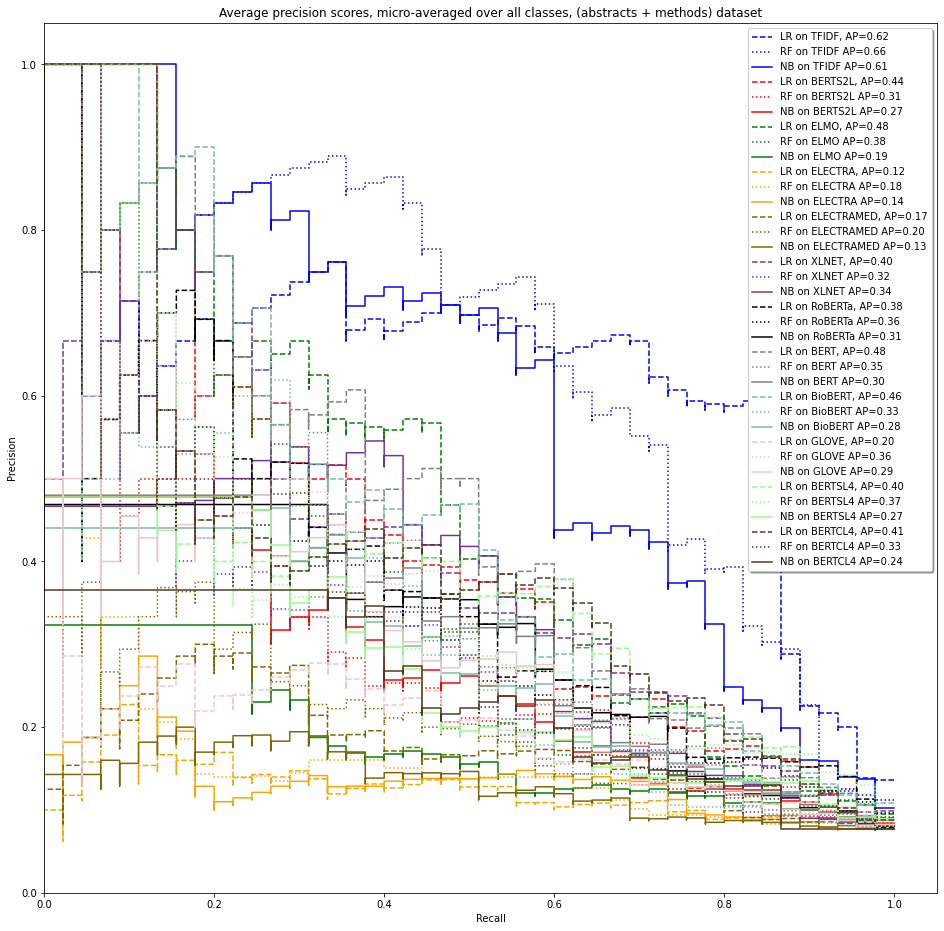

In [436]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,16))
# TFIDF (0.9, 0.1, 0.9)
# BERTS2L (0.5, 0.1, 0.9)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.title('Average precision scores, micro-averaged over all classes, (abstracts + methods) dataset')

plt.step(recall_LRTFIDF['micro'], precision_LRTFIDF['micro'],'k--', where='post', color='blue')
plt.step(recall_RFTFIDF['micro'], precision_RFTFIDF['micro'], 'k:', where='post', color='blue')
plt.step(recall_NBTFIDF['micro'], precision_NBTFIDF['micro'], 'k', where='post', color='blue')

plt.step(recall_LRBERTS2L['micro'], precision_LRBERTS2L['micro'], 'k--', where='post', color='red')
plt.step(recall_RFBERTS2L['micro'], precision_RFBERTS2L['micro'], 'k:', where='post', color='red')
plt.step(recall_NBBERTS2L['micro'], precision_NBBERTS2L['micro'], 'k', where='post', color='red')

plt.step(recall_LRELMO['micro'], precision_LRELMO['micro'], 'k--', where='post', color='green')
plt.step(recall_RFELMO['micro'], precision_RFELMO['micro'], 'k:', where='post', color='green')
plt.step(recall_NBELMO['micro'], precision_NBELMO['micro'], 'k', where='post', color='green')

plt.step(recall_LRELECTRA['micro'], precision_LRELECTRA['micro'], 'k--', where='post', color='orange')
plt.step(recall_RFELECTRA['micro'], precision_RFELECTRA['micro'], 'k:', where='post', color='orange')
plt.step(recall_NBELECTRA['micro'], precision_NBELECTRA['micro'], 'k', where='post', color='orange')

plt.step(recall_LRELECTRAMED['micro'], precision_LRELECTRAMED['micro'], 'k--', where='post', color='#806600')
plt.step(recall_RFELECTRAMED['micro'], precision_RFELECTRAMED['micro'], 'k:', where='post', color='#806600')
plt.step(recall_NBELECTRAMED['micro'], precision_NBELECTRAMED['micro'], 'k', where='post', color='#806600')

plt.step(recall_LRXLNET['micro'], precision_LRXLNET['micro'], 'k--', where='post', color='#75329F')
plt.step(recall_RFXLNET['micro'], precision_RFXLNET['micro'], 'k:', where='post', color='#75329F')
plt.step(recall_NBXLNET['micro'], precision_NBXLNET['micro'], 'k', where='post', color='#75329F')

plt.step(recall_LRRoBERTa['micro'], precision_LRRoBERTa['micro'], 'k--', where='post', color='black')
plt.step(recall_RFRoBERTa['micro'], precision_RFRoBERTa['micro'], 'k:', where='post', color='black')
plt.step(recall_NBRoBERTa['micro'], precision_NBRoBERTa['micro'], 'k', where='post', color='black')

plt.step(recall_LRBERT['micro'], precision_LRBERT['micro'], 'k--', where='post', color='grey')
plt.step(recall_RFBERT['micro'], precision_RFBERT['micro'], 'k:', where='post', color='grey')
plt.step(recall_NBBERT['micro'], precision_NBBERT['micro'], 'k', where='post', color='grey')

plt.step(recall_LRBioBERT['micro'], precision_LRBioBERT['micro'], 'k--', where='post', color='#75BD9F')
plt.step(recall_RFBioBERT['micro'], precision_RFBioBERT['micro'], 'k:', where='post', color='#75BD9F')
plt.step(recall_NBBioBERT['micro'], precision_NBBioBERT['micro'], 'k', where='post', color='#75BD9F')

plt.step(recall_LRGLOVE['micro'], precision_LRGLOVE['micro'], 'k--', where='post', color='#F1C6C6')
plt.step(recall_RFGLOVE['micro'], precision_RFGLOVE['micro'], 'k:', where='post', color='#F1C6C6')
plt.step(recall_NBGLOVE['micro'], precision_NBGLOVE['micro'], 'k', where='post', color='#F1C6C6')

plt.step(recall_LRBERTSL4['micro'], precision_LRBERTSL4['micro'], 'k--', where='post', color='#91FF8B')
plt.step(recall_RFBERTSL4['micro'], precision_RFBERTSL4['micro'], 'k:', where='post', color='#91FF8B')
plt.step(recall_NBBERTSL4['micro'], precision_NBBERTSL4['micro'], 'k', where='post', color='#91FF8B')

plt.step(recall_LRBERTCL4['micro'], precision_LRBERTCL4['micro'], 'k--', where='post', color='#56351F')
plt.step(recall_RFBERTCL4['micro'], precision_RFBERTCL4['micro'], 'k:', where='post', color='#56351F')
plt.step(recall_NBBERTCL4['micro'], precision_NBBERTCL4['micro'], 'k', where='post', color='#56351F')


plt.legend(['LR on TFIDF, AP={0:0.2f}'.format(average_precision_LRTFIDF["micro"]), 
           'RF on TFIDF AP={0:0.2f}'.format(average_precision_RFTFIDF["micro"]),
           'NB on TFIDF AP={0:0.2f}'.format(average_precision_NBTFIDF["micro"]),
           'LR on BERTS2L, AP={0:0.2f}'.format(average_precision_LRBERTS2L["micro"]), 
           'RF on BERTS2L AP={0:0.2f}'.format(average_precision_RFBERTS2L["micro"]),
           'NB on BERTS2L AP={0:0.2f}'.format(average_precision_NBBERTS2L["micro"]),
           'LR on ELMO, AP={0:0.2f}'.format(average_precision_LRELMO["micro"]), 
           'RF on ELMO AP={0:0.2f}'.format(average_precision_RFELMO["micro"]),
           'NB on ELMO AP={0:0.2f}'.format(average_precision_NBELMO["micro"]),
           'LR on ELECTRA, AP={0:0.2f}'.format(average_precision_LRELECTRA["micro"]), 
           'RF on ELECTRA AP={0:0.2f}'.format(average_precision_RFELECTRA["micro"]),
           'NB on ELECTRA AP={0:0.2f}'.format(average_precision_NBELECTRA["micro"]),
           'LR on ELECTRAMED, AP={0:0.2f}'.format(average_precision_LRELECTRAMED["micro"]), 
           'RF on ELECTRAMED AP={0:0.2f}'.format(average_precision_RFELECTRAMED["micro"]),
           'NB on ELECTRAMED AP={0:0.2f}'.format(average_precision_NBELECTRAMED["micro"]),
           'LR on XLNET, AP={0:0.2f}'.format(average_precision_LRXLNET["micro"]), 
           'RF on XLNET AP={0:0.2f}'.format(average_precision_RFXLNET["micro"]),
           'NB on XLNET AP={0:0.2f}'.format(average_precision_NBXLNET["micro"]),
           'LR on RoBERTa, AP={0:0.2f}'.format(average_precision_LRRoBERTa["micro"]), 
           'RF on RoBERTa AP={0:0.2f}'.format(average_precision_RFRoBERTa["micro"]),
           'NB on RoBERTa AP={0:0.2f}'.format(average_precision_NBRoBERTa["micro"]),
           'LR on BERT, AP={0:0.2f}'.format(average_precision_LRBERT["micro"]), 
           'RF on BERT AP={0:0.2f}'.format(average_precision_RFBERT["micro"]),
           'NB on BERT AP={0:0.2f}'.format(average_precision_NBBERT["micro"]),
           'LR on BioBERT, AP={0:0.2f}'.format(average_precision_LRBioBERT["micro"]), 
           'RF on BioBERT AP={0:0.2f}'.format(average_precision_RFBioBERT["micro"]),
           'NB on BioBERT AP={0:0.2f}'.format(average_precision_NBBioBERT["micro"]),
           'LR on GLOVE, AP={0:0.2f}'.format(average_precision_LRGLOVE["micro"]), 
           'RF on GLOVE AP={0:0.2f}'.format(average_precision_RFGLOVE["micro"]),
           'NB on GLOVE AP={0:0.2f}'.format(average_precision_NBGLOVE["micro"]),
           'LR on BERTSL4, AP={0:0.2f}'.format(average_precision_LRBERTSL4["micro"]), 
           'RF on BERTSL4 AP={0:0.2f}'.format(average_precision_RFBERTSL4["micro"]),
           'NB on BERTSL4 AP={0:0.2f}'.format(average_precision_NBBERTSL4["micro"]),
           'LR on BERTCL4, AP={0:0.2f}'.format(average_precision_LRBERTCL4["micro"]), 
           'RF on BERTCL4 AP={0:0.2f}'.format(average_precision_RFBERTCL4["micro"]),
           'NB on BERTCL4 AP={0:0.2f}'.format(average_precision_NBBERTCL4["micro"])
           ], loc='best', shadow=True)



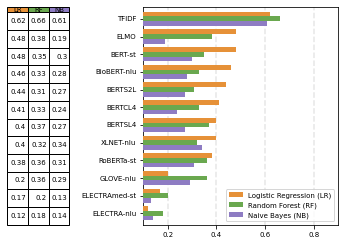

In [532]:

labels = ['TFIDF', 'GLOVE-nlu', 'ELMO', 'BERT-st', 'BERTCL4', 'BERTSL4', 'BERTS2L', 'BioBERT-nlu', 'RoBERTa-st', 'XLNET-nlu', 'ELECTRA-nlu', 'ELECTRAmed-st']

LR_AP = [0.62, 0.20, 0.48, 0.48, 0.41, 0.40, 0.44, 0.46, 0.38, 0.40, 0.12, 0.17]
RF_AP = [0.66, 0.36, 0.38 , 0.35, 0.33, 0.37, 0.31, 0.33, 0.36, 0.32, 0.18, 0.20]
NB_AP = [0.61, 0.29, 0.19, 0.30, 0.24, 0.27, 0.27, 0.28, 0.31, 0.34, 0.14, 0.13]


#colors = sns.color_palette("muted")  

pltdf = pd.DataFrame({'Logistic Regression (LR)': LR_AP,
                      'Random Forest (RF)': RF_AP,
                      'Naive Bayes (NB)': NB_AP}, index=labels)

pltdf=pltdf.sort_values(by='Logistic Regression (LR)', ascending=False)

ax = pltdf.plot(kind='barh', fontsize=7, figsize=(3.487, 4), zorder=10, color=["#e69138", "#6aa84f", "#8e7cc3"], width=.8)
ax.set(xlim=[0.1, 0.9])


# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.1, color='#0d0e10', zorder=2)
ax.invert_yaxis()

# Plot bars and create text labels for the table

data=pltdf.sort_values(by='Logistic Regression (LR)', ascending=False).to_numpy().tolist()

index=pltdf.sort_values(by='Logistic Regression (LR)', ascending=False).index.values.tolist()

 
# Add a table at the left of the axes
the_table = ax.table(cellText=data,
                     bbox=[-.7, 0.001, 0.32, 1],
                     colLabels= ["LR", "RF", "NB"],
                     colColours=["#e69138", "#6aa84f", "#8e7cc3"],
                     loc='left')

cellDict = the_table.get_celld()
for i in range(0, 3):
    cellDict[(0,i)].set_height(3)
    for j in range(1,len(data)+1):
        cellDict[(j,i)].set_height(10)

the_table.auto_set_font_size(True)
the_table.set_fontsize(7)
plt.legend(fontsize=7)

#plt.show()
fig = plt.gcf()
plt.savefig('/Users/kaoutar/Desktop/methodsPRCscores.png',
            bbox_inches='tight',
            dpi=350
            )
